In [14]:
%%HTML
<style type='text/css'>
    *{
        # background-color:#E3EDCD;
        # background-color:black;
        # color:white;
        
    }
    h1{
        color:#1976d2;
    }
    h2{
        color:#f57c00;
    }
    h3{
        color:#ba37ff;
    }
    h4{
        color:green;
    }
    table{
        border:1px solid black !important;
        border-collapse:collapse !important;
    }
    th{
        background-color:blueviolet !important;
        text-align:center;
        color:white;
    }
    th,td{
        border:0.1px solid black !important;
        transition:0.2s all liner;
        
    }
    td:hover{
        transform:scale(1.1);
        background-color:orange;
        color:blueviolet;
    }
    .raw{
        white-space:pre;
    }
</style>

<h2>5.4DataFrame运算</h2>

<p>学习目标</p>

<li>应用add等实现数据间的加、减法运算</li>
<li>应用逻辑运算符号实现数据的逻辑筛选</li>
<li>应用isin, query实现数据的筛选</li>
<li>使用describe完成综合统计</li>
<li>使用max, min, mean, std完成统计计算</li>
<li>使用idxmin、idxmax完成最大值最小值的索引</li>
<li>使用cumsum等实现累计分析</li>
<li>应用apply函数实现数据的自定义处理</li>

<h3> 1算术运算</h3>

<li>add(other)</li>

<p>比如进行数学运算加上具体的数字</p>

In [2]:
import pandas as pd
data = pd.read_csv('../data/stock_day.csv')

In [3]:
data.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [4]:
# 给open列加上一个具体的数字
data['open'].add(1)

2018-02-27    24.53
2018-02-26    23.80
2018-02-23    23.88
2018-02-22    23.25
2018-02-14    22.49
              ...  
2015-03-06    14.17
2015-03-05    13.88
2015-03-04    13.80
2015-03-03    13.52
2015-03-02    13.25
Name: open, Length: 643, dtype: float64

<h3>2逻辑运算</h3>

<li>例如筛选data["open"] > 23的日期数据</li>

In [5]:
data['open']>23

2018-02-27     True
2018-02-26    False
2018-02-23    False
2018-02-22    False
2018-02-14    False
              ...  
2015-03-06    False
2015-03-05    False
2015-03-04    False
2015-03-03    False
2015-03-02    False
Name: open, Length: 643, dtype: bool

<li>完成多个逻辑判断，</li>

In [6]:
data[(data['open']>23) &(data['open']<24)].head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


<h3>2.2 逻辑运算函数
</h3>

<li>query(expr)</li>
<p class='raw'>
    参数:
    expr:查询字符串
</p>

In [7]:
data.query?

Signature: data.query(expr: 'str', *, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None'
Docstring:
Query the columns of a DataFrame with a boolean expression.

Parameters
----------
expr : str
    The query string to evaluate.

    You can refer to variables
    in the environment by prefixing them with an '@' character like
    ``@a + b``.

    You can refer to column names that are not valid Python variable names
    by surrounding them in backticks. Thus, column names containing spaces
    or punctuations (besides underscores) or starting with digits must be
    surrounded by backticks. (For example, a column named "Area (cm^2)" would
    be referenced as ```Area (cm^2)```). Column names which are Python keywords
    (like "list", "for", "import", etc) cannot be used.

    For example, if one of your columns is called ``a a`` and you want
    to sum it with ``b``, your query should be ```a a` + b``.

inplace : bool
    Whether to modify the DataFrame rather than creating a ne

In [8]:
# 通过query是的刚才的过程更加方便简单
data.query('open<24 & open>23').head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-01,23.71,23.86,22.42,22.22,66414.64,-1.30,-5.48,23.646,24.365,24.279,52812.35,80394.43,88480.92,1.66
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2018-01-30,23.71,24.08,23.83,23.70,32420.43,0.05,0.21,24.350,24.671,24.365,77485.53,84805.23,92943.35,0.81
2018-01-16,23.40,24.60,24.40,23.30,101295.42,0.96,4.10,23.908,24.058,23.321,82003.73,101081.47,74590.92,2.54


<li>isin(values)</li>

<p>例如判断'open'是否为23.53  和 23.85 (离散)</p>

In [10]:
data.isin?

Signature: data.isin(values: 'Series | DataFrame | Sequence | Mapping') -> 'DataFrame'
Docstring:
Whether each element in the DataFrame is contained in values.

Parameters
----------
values : iterable, Series, DataFrame or dict
    The result will only be true at a location if all the
    labels match. If `values` is a Series, that's the index. If
    `values` is a dict, the keys must be the column names,
    which must match. If `values` is a DataFrame,
    then both the index and column labels must match.

Returns
-------
DataFrame
    DataFrame of booleans showing whether each element in the DataFrame
    is contained in values.

See Also
--------
DataFrame.eq: Equality test for DataFrame.
Series.isin: Equivalent method on Series.
Series.str.contains: Test if pattern or regex is contained within a
    string of a Series or Index.

Examples
--------
>>> df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
...                   index=['falcon', 'dog'])
>>> df
        num_legs 

In [12]:
data[data['open'].isin([23.53,23.85])]


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-01-31,23.85,23.98,23.72,23.31,49155.02,-0.11,-0.46,24.036,24.583,24.411,60348.94,80496.48,91666.75,1.23
2017-07-26,23.53,23.92,23.40,22.85,110276.48,-0.30,-1.27,23.200,22.718,22.286,130237.86,140918.73,160464.67,2.76
2015-12-18,23.53,24.66,23.99,23.43,109230.05,0.65,2.79,22.834,22.264,22.163,66728.10,68518.08,68161.18,3.74
2015-11-26,23.85,24.08,23.53,23.50,51446.29,-0.31,-1.30,23.710,24.357,23.395,74550.04,110489.85,109815.49,1.76


<h3>3统计运算</h3>

<h4>3.1 describe</h4>

<p>综合分析: 能够直接得出很多统计结果,count, mean, std, min, max 等</p>

In [13]:
# 计算平均值、标准差、最大值、最小值
data.describe()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
count,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000,643.000000
mean,21.272706,21.900513,21.336267,20.771835,99905.519114,0.018802,0.190280,21.302362,21.267656,21.200946,100008.642691,100287.542177,100797.518398,2.936190
std,3.930973,4.077578,3.942806,3.791968,73879.119354,0.898476,4.079698,3.880640,3.813602,3.686186,62761.578326,56759.082060,50101.575639,2.079375
min,12.250000,12.670000,12.360000,12.200000,1158.120000,-3.520000,-10.030000,12.520000,12.520000,12.520000,10804.740000,19130.510000,23311.000000,0.040000
25%,19.000000,19.500000,19.045000,18.525000,48533.210000,-0.390000,-1.850000,18.990000,19.102000,19.275000,55794.985000,59861.955000,64103.675000,1.360000
50%,21.440000,21.970000,21.450000,20.980000,83175.930000,0.050000,0.260000,21.504000,21.623000,21.530000,86133.330000,89234.970000,96291.730000,2.500000
75%,23.400000,24.065000,23.415000,22.850000,127580.055000,0.455000,2.305000,23.318000,23.098500,23.136000,127655.655000,124693.255000,124001.015000,3.915000
max,34.990000,36.350000,35.210000,34.010000,501915.410000,3.030000,10.030000,33.696000,32.186000,29.998000,404443.540000,360028.160000,269280.790000,12.560000


<h4>3.2统计函数</h4>

<table>
<thead>
<tr>
<th>函数</th>
<th>作用</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>sum</code></td>
<td><strong>Sum of values</strong></td>
</tr>
<tr>
<td><code>mean</code></td>
<td><strong>Mean of values</strong></td>
</tr>
<tr>
<td><code>median</code></td>
<td>Arithmetic median of values</td>
</tr>
<tr>
<td><code>min</code></td>
<td><strong>Minimum</strong></td>
</tr>
<tr>
<td><code>max</code></td>
<td><strong>Maximum</strong></td>
</tr>
<tr>
<td><code>count</code></td>
<td>Number of non-NA observations</td>
</tr>
<tr>
<td><code>abs</code></td>
<td>Absolute Value</td>
</tr>
<tr>
<td><code>prod</code></td>
<td>Product of values 乘积</td>
</tr>
<tr>
<td><code>std</code></td>
<td><strong>Bessel-corrected sample standard deviation 标准差</strong></td>
</tr>
<tr>
<td><code>var</code></td>
<td><strong>Unbiased variance 方差</strong></td>
</tr>
<tr>
<td><code>idxmax</code></td>
<td>compute the index labels with the maximum 最大值的索引下标</td>
</tr>
<tr>
<td><code>idxmin</code></td>
<td>compute the index labels with the minimum 最小值的索引下标</td>
</tr>
<tr>
<td><code>mode</code></td>
<td>Mode众数</td>
</tr>
</tbody>
</table>

<p>对于单个函数去进行统计的时候，坐标轴还是按照默认列“columns” (axis=0, default)，如果要对行“index” 需要指定(axis=1)</p>

<li>max(),min()</li>

In [15]:
data.max(0)

open                34.990
high                36.350
close               35.210
low                 34.010
volume          501915.410
price_change         3.030
p_change            10.030
ma5                 33.696
ma10                32.186
ma20                29.998
v_ma5           404443.540
v_ma10          360028.160
v_ma20          269280.790
turnover            12.560
dtype: float64

<li>std()、var()</li>

In [29]:
# 标准差
data.std(0) #写0是为了指定是按列来进行的而不是按行来进行的

open                3.930973
high                4.077578
close               3.942806
low                 3.791968
volume          73879.119354
price_change        0.898476
p_change            4.079698
ma5                 3.880640
ma10                3.813602
ma20                3.686186
v_ma5           62761.578326
v_ma10          56759.082060
v_ma20          50101.575639
turnover            2.079375
dtype: float64

In [20]:
# 方差
data.var(0)

open            1.545255e+01
high            1.662665e+01
close           1.554572e+01
low             1.437902e+01
volume          5.458124e+09
price_change    8.072595e-01
p_change        1.664394e+01
ma5             1.505937e+01
ma10            1.454356e+01
ma20            1.358797e+01
v_ma5           3.939016e+09
v_ma10          3.221593e+09
v_ma20          2.510168e+09
turnover        4.323800e+00
dtype: float64

<li>median()：中位数</li>

<p>中位数为将数据从小到大排列，在最中间的那个数为中位数。如果没有中间数，取中间两个数的平均值</p>

In [28]:
df = pd.DataFrame({
    'COL1':[2,3,4,5,4,2],
    'COL2':[0,1,2,3,4,2]
})
print(df)
df.median(0)

   COL1  COL2
0     2     0
1     3     1
2     4     2
3     5     3
4     4     4
5     2     2


COL1    3.5
COL2    2.0
dtype: float64

<li>idxmax()、idxmin()</li>

In [31]:
# 求出最大值和最小值的位置
maxindex = df.idxmax(0)
minindex = df.idxmin(0)
print(maxindex,minindex)

COL1    3
COL2    4
dtype: int64 COL1    0
COL2    0
dtype: int64


In [35]:
df['COL1']

0    2
1    3
2    4
3    5
4    4
5    2
Name: COL1, dtype: int64

In [58]:
COL1MAXINDEX=maxindex['COL1']
COL1MAXINDEX
col1max=int(COL1MAXINDEX)
col1max

3

In [56]:
df['COL1'][col1max]

np.int64(5)

<h4>3.3 累计统计函数</h4>

<table>
<thead>
<tr>
<th>函数</th>
<th>作用</th>
</tr>
</thead>
<tbody>
<tr>
<td><code>cumsum</code></td>
<td><strong>计算前1/2/3/…/n个数的和</strong></td>
</tr>
<tr>
<td><code>cummax</code></td>
<td>计算前1/2/3/…/n个数的最大值</td>
</tr>
<tr>
<td><code>cummin</code></td>
<td>计算前1/2/3/…/n个数的最小值</td>
</tr>
<tr>
<td><code>cumprod</code></td>
<td>计算前1/2/3/…/n个数的积</td>
</tr>
</tbody>
</table>

In [61]:
# cumulative func 累计函数 

<p>以上这些函数可以对series和dataframe操作</p>

<p>这里我们按找时间的从前往后来进行统计</p>

<li>排序</li>

In [77]:
# 排序之后进行累计求和
data.sort_index(ascending=True)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53


<li>对p_change进行求和</li>

In [63]:
stock_rise = data['p_change']

In [64]:
# plot方法集成了多种绘图功能
stock_rise.cumsum()

2018-02-27      2.68
2018-02-26      5.70
2018-02-23      8.12
2018-02-22      9.76
2018-02-14     11.81
               ...  
2015-03-06    114.70
2015-03-05    116.72
2015-03-04    118.29
2015-03-03    119.73
2015-03-02    122.35
Name: p_change, Length: 643, dtype: float64

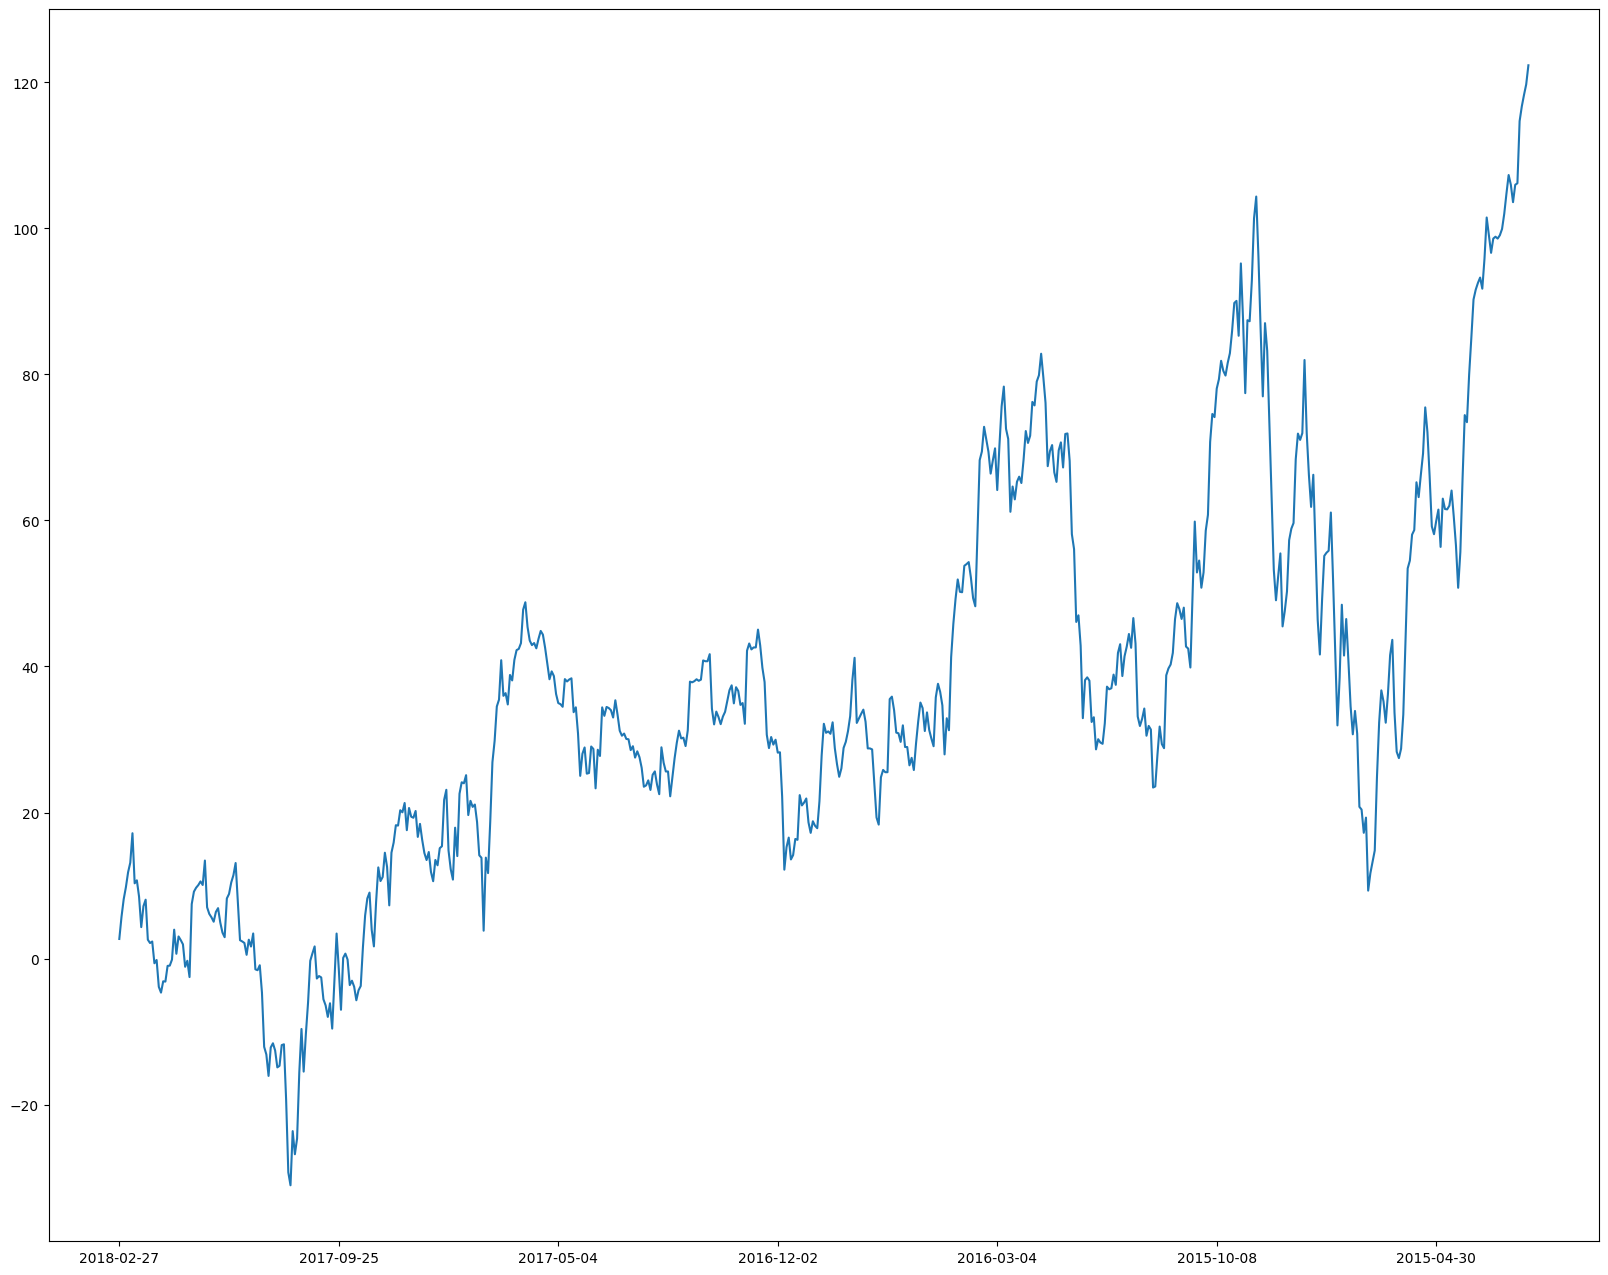

In [71]:
# 利用matplotlib将折线图像画出来

import matplotlib.pyplot as plt
plt.figure(figsize=(20,16))
stock_rise.cumsum().plot() #利用pandas对plot的封装,可以通过对象.plot()直接来画出图
plt.show()

<h3>4自定义运算</h3>

<ul>
    <li>apply(func, axis=0)
        <ul>
            <li>func:自定义函数</li>
            <li>axis=0:默认是列，axis=1为行进行运算</li>
        </ul>
    </li>
    <li>定义一个对列，最大值-最小值的函数</li>
</ul>

In [72]:
data[['open','close']].apply(lambda x: x.max()-x.min(),axis=0)

open     22.74
close    22.85
dtype: float64